In [26]:
import pandas as pd

file_path = "SuperStoreUS-2015.xlsx"
data = pd.read_excel(file_path)

print(data.head())

   Row ID Order Priority  Discount  Unit Price  Shipping Cost  Customer ID  \
0   20847           High      0.01        2.84           0.93            3   
1   20228  Not Specified      0.02      500.98          26.00            5   
2   21776       Critical      0.06        9.48           7.29           11   
3   24844         Medium      0.09       78.69          19.99           14   
4   24846         Medium      0.08        3.28           2.31           14   

       Customer Name       Ship Mode Customer Segment Product Category  ...  \
0      Bonnie Potter     Express Air        Corporate  Office Supplies  ...   
1     Ronnie Proctor  Delivery Truck      Home Office        Furniture  ...   
2      Marcus Dunlap     Regular Air      Home Office        Furniture  ...   
3  Gwendolyn F Tyson     Regular Air   Small Business        Furniture  ...   
4  Gwendolyn F Tyson     Regular Air   Small Business  Office Supplies  ...   

    Region State or Province         City  Postal Code O

For this hackathon, I plan to create a supply chain optimization platform powered by AI. This platform will focus on demand forecasting, route optimization, and managing suppliers. By leveraging machine learning and real-time data analytics, it aims to help businesses improve their supply chain processes, cut costs, and make better decisions. Ultimately, this project is about enhancing efficiency and promoting sustainability in operations.

In [27]:

data.describe()

,Row ID,Discount,Unit Price,Shipping Cost,Customer ID,Product Base Margin,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1936.000000,1952.000000,1952,1952,1952.000000,1952.000000,1952.000000,1952.000000
mean,19916.479508,0.048975,109.079221,12.968151,1735.376537,0.515186,51534.769467,2015-03-29 01:21:08.852459008,2015-03-30 23:55:34.426229248,114.793859,12.944672,985.828832,82365.924180
min,64.000000,0.000000,1.140000,0.490000,3.000000,0.350000,1001.000000,2015-01-01 00:00:00,2015-01-02 00:00:00,-16476.838000,1.000000,2.250000,359.000000
25%,19121.000000,0.020000,6.480000,3.230000,875.000000,0.380000,28560.000000,2015-02-11 00:00:00,2015-02-13 00:00:00,-84.485400,5.000000,58.807500,86767.750000
50%,21164.500000,0.050000,20.990000,6.150000,1738.000000,0.525000,48765.500000,2015-03-27 12:00:00,2015-03-29 00:00:00,1.476450,10.000000,202.395000,88376.000000
75%,23483.250000,0.080000,100.972500,14.362500,2578.250000,0.590000,78550.000000,2015-05-15 00:00:00,2015-05-16 00:00:00,116.201575,16.000000,802.945000,89957.000000
max,26389.000000,0.210000,6783.020000,164.730000,3403.000000,0.850000,99362.000000,2015-06-30 00:00:00,2015-07-08 00:00:00,9228.225600,167.000000,45737.330000,91586.000000
std,5957.595627,0.031378,393.481301,17.414631,991.078006,0.137055,29362.828420,NaN,NaN,1141.112387,13.871565,2559.900167,19042.295798


In [28]:

total_nulls = data.isnull().sum()

print(total_nulls)



Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     16
Country                  0
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64


In [29]:
null_count = data.isnull().sum()

print(total_nulls)

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     16
Country                  0
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64


In [30]:

duplicates = data.duplicated()
print(f"Total number of duplicate rows: {duplicates.sum()}")

Total number of duplicate rows: 0


In [31]:
data['Product Base Margin'].fillna(data['Product Base Margin'].mean(), inplace=True)
print(data)

      Row ID Order Priority  Discount  Unit Price  Shipping Cost  Customer ID  \
0      20847           High      0.01        2.84           0.93            3   
1      20228  Not Specified      0.02      500.98          26.00            5   
2      21776       Critical      0.06        9.48           7.29           11   
3      24844         Medium      0.09       78.69          19.99           14   
4      24846         Medium      0.08        3.28           2.31           14   
...      ...            ...       ...         ...            ...          ...   
1947   19842           High      0.01       10.90           7.46         3397   
1948   19843           High      0.10        7.99           5.03         3397   
1949   26208  Not Specified      0.08       11.97           5.81         3399   
1950   24911         Medium      0.10        9.38           4.93         3400   
1951   25914           High      0.10      105.98          13.99         3403   

          Customer Name    

C:\Users\ammou\AppData\Local\Temp\ipykernel_11144\3779444177.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Product Base Margin'].fillna(data['Product Base Margin'].mean(), inplace=True)


In [32]:
columns = ['Order Priority', 'Ship Mode', 'Customer Segment', 
                       'Product Category', 'Product Sub-Category', 
                       'Product Container', 'Country', 'Region', 
                       'State or Province', 'City']

for column in columns:
    print(f"Unique values in '{column}':{data[column].unique()}\n")



Unique values in 'Order Priority':['High' 'Not Specified' 'Critical' 'Medium' 'Low' 'Critical ']

Unique values in 'Ship Mode':['Express Air' 'Delivery Truck' 'Regular Air']

Unique values in 'Customer Segment':['Corporate' 'Home Office' 'Small Business' 'Consumer']

Unique values in 'Product Category':['Office Supplies' 'Furniture' 'Technology']

Unique values in 'Product Sub-Category':['Pens & Art Supplies' 'Chairs & Chairmats' 'Office Furnishings'
 'Rubber Bands' 'Envelopes' 'Telephones and Communication'
 'Office Machines' 'Paper' 'Binders and Binder Accessories' 'Labels'
 'Storage & Organization' 'Tables' 'Scissors, Rulers and Trimmers'
 'Computer Peripherals' 'Bookcases' 'Appliances' 'Copiers and Fax']

Unique values in 'Product Container':['Wrap Bag' 'Jumbo Drum' 'Small Pack' 'Small Box' 'Medium Box' 'Jumbo Box'
 'Large Box']

Unique values in 'Country':['United States']

Unique values in 'Region':['West' 'East' 'Central' 'South']

Unique values in 'State or Province':['Washingt

In [33]:
print(data['Order Priority'].unique())

['High' 'Not Specified' 'Critical' 'Medium' 'Low' 'Critical ']


In [34]:
data['Order Priority'] = data['Order Priority'].str.strip()

priority_mapping = {
    "Critical": 4,
    "High": 3,
    "Medium": 2,
    "Low": 1,
    "Not Specified": 0  
}

data['Order Priority'] = data['Order Priority'].map(priority_mapping)
print(data['Order Priority'].unique())
print(data.head())

[3 0 4 2 1]
   Row ID  Order Priority  Discount  Unit Price  Shipping Cost  Customer ID  \
0   20847               3      0.01        2.84           0.93            3   
1   20228               0      0.02      500.98          26.00            5   
2   21776               4      0.06        9.48           7.29           11   
3   24844               2      0.09       78.69          19.99           14   
4   24846               2      0.08        3.28           2.31           14   

       Customer Name       Ship Mode Customer Segment Product Category  ...  \
0      Bonnie Potter     Express Air        Corporate  Office Supplies  ...   
1     Ronnie Proctor  Delivery Truck      Home Office        Furniture  ...   
2      Marcus Dunlap     Regular Air      Home Office        Furniture  ...   
3  Gwendolyn F Tyson     Regular Air   Small Business        Furniture  ...   
4  Gwendolyn F Tyson     Regular Air   Small Business  Office Supplies  ...   

    Region State or Province         C

<Figure size 1000x500 with 0 Axes>

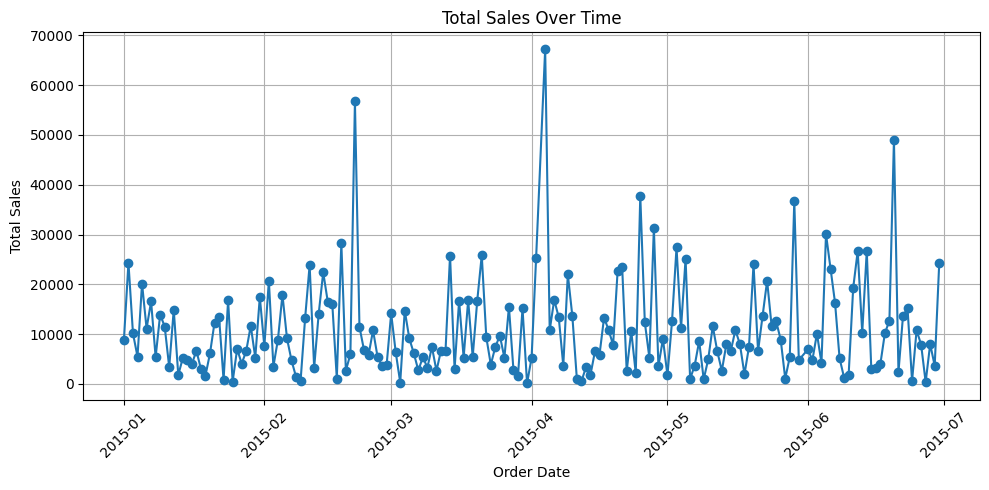

In [35]:
# What else to do in here: 
# Date fix
# EDA: to understand the data
# Step 4: Train ARIMA Model
# Define ARIMA model order (p, d, q)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))

data = data.sort_values('Order Date')

data_agg = data.groupby('Order Date')['Sales'].sum().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(data_agg['Order Date'], data_agg['Sales'], marker='o', linestyle='-')
plt.title('Total Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

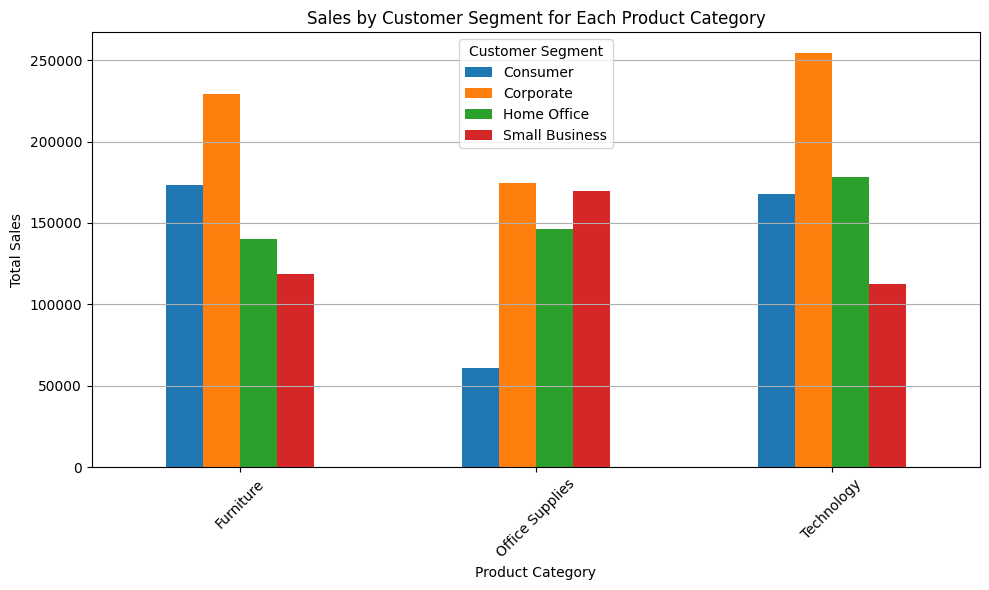

In [36]:
# We want to understand the highest customer segment for most products
# Aggregate sales by customer segment and product category
segment_sales = data.groupby(['Customer Segment', 'Product Category'])['Sales'].sum().reset_index()

# Pivot the data for better visualization
pivot_segment_sales = segment_sales.pivot(index='Product Category', columns='Customer Segment', values='Sales')

# Plotting a grouped bar chart
pivot_segment_sales.plot(kind='bar', figsize=(10, 6))
plt.title('Sales by Customer Segment for Each Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Customer Segment')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

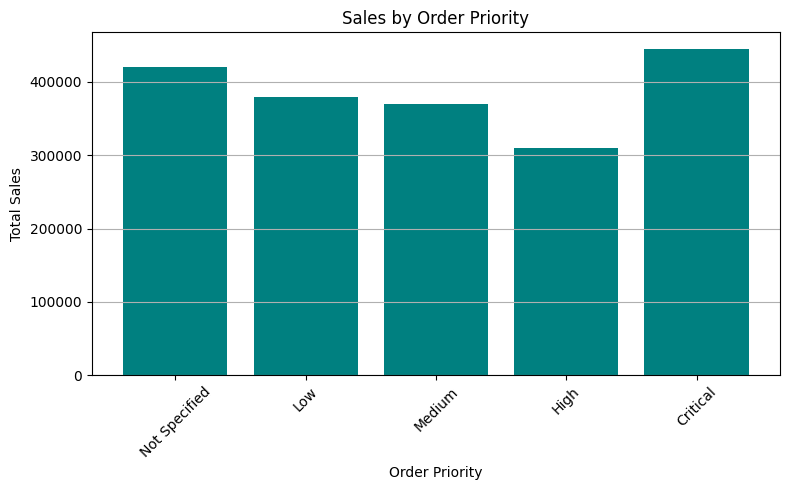